In [1]:
# HW - compute the spectogram of a classical music song, or a song of your choice
# see if you can classify jazz vs classical vs pop music

In [11]:
import scipy
import scipy.io
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import sounddevice as sd

In [ ]:
# classical song - Chopin's Marche Funèbre (Funeral March) piano sonata i - VI 
# pop song - ghost town by kanye west
# jazz song - Oleo https://www.youtube.com/watch?v=970VkmWa6IY 3:48 I - VI7 - ii - V

In [3]:
os.getcwd()

'c:\\Users\\itsjo\\Documents\\repos\\data-driven-physics\\dimensionality_reduction_and_transforms'

In [4]:
sampling_rate = 24000
y, sr = librosa.load('chopin.mp3', sr=sampling_rate)

In [28]:
# computing the fourier transform
D = librosa.stft(y[0:100000], n_fft=5000, hop_length=400, win_length=5000)

# converting to log Db scale so we can see the different notes
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [ ]:
# use this to plot frequencies
freq = lambda n: 440 * (2 ** (1/12)) ** (n - 49)
# print(freq(40))  # frequency of 40th key = C -> 261.63 Hz which is right

In [66]:
x = range(37, 73)

freqs = [freq(n) for n in x]

notes = ["A", "Bb", "B", "C", "Db", "D", "Eb", "E", "F", "Gb", "G", "Ab"]
notes *= 3

In [67]:
len(notes)

36

In [68]:
len(freqs)

36

In [69]:
freqs

[219.9999999999999,
 233.08188075904488,
 246.94165062806198,
 261.6255653005985,
 277.182630976872,
 293.66476791740746,
 311.1269837220808,
 329.62755691286986,
 349.2282314330038,
 369.99442271163434,
 391.99543598174927,
 415.3046975799451,
 440.0,
 466.1637615180899,
 493.8833012561241,
 523.2511306011974,
 554.3652619537443,
 587.3295358348153,
 622.253967444162,
 659.2551138257401,
 698.456462866008,
 739.988845423269,
 783.990871963499,
 830.6093951598907,
 880.0000000000003,
 932.3275230361803,
 987.7666025122488,
 1046.5022612023952,
 1108.7305239074892,
 1174.659071669631,
 1244.5079348883246,
 1318.5102276514808,
 1396.912925732017,
 1479.977690846539,
 1567.9817439269987,
 1661.218790319782]

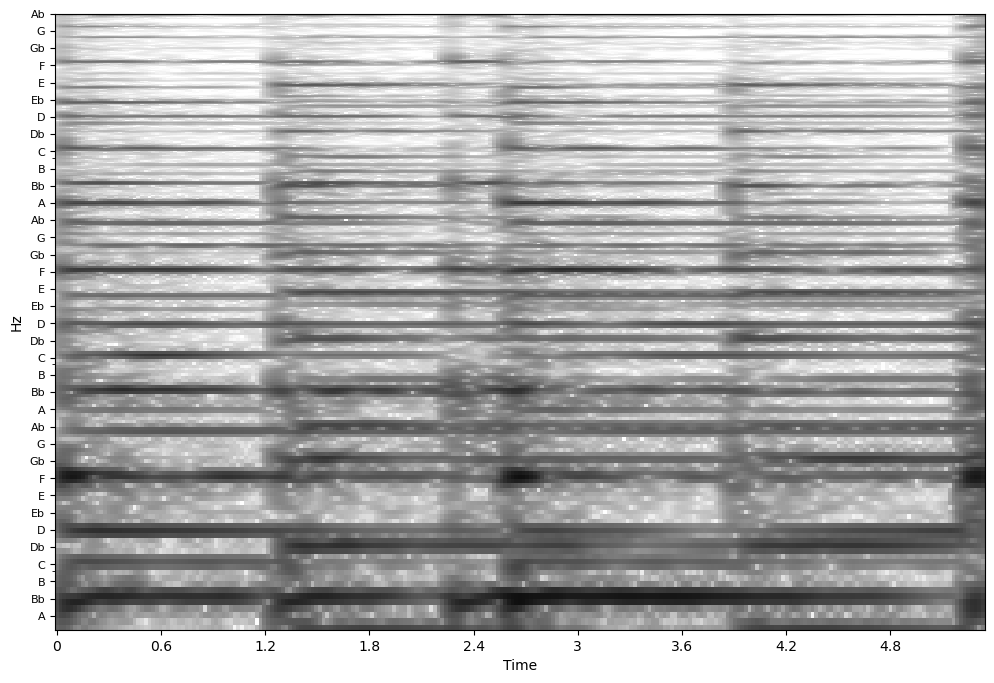

In [71]:
# Display spectogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log', cmap='Greys')

plt.ylim(210, 1000)

plt.yticks(freqs, notes, fontsize=8)


plt.show()

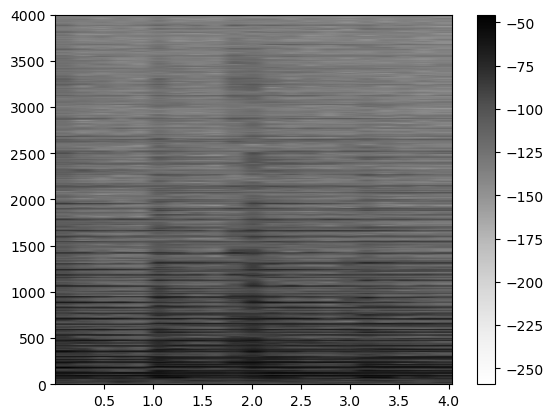

In [26]:
plt.specgram(y[0:100000], NFFT=5000, Fs=sr, noverlap=400, cmap="Greys")
plt.colorbar()
plt.ylim(0, 4000)
plt.show()

In [9]:
np.size(y)

13297372

In [52]:
sd.play(y[0:100000], sr)